In [1]:
import sys
sys.path.append('..')

%reload_ext autoreload
%autoreload 2
%aimport sponge_networks
# # %aimport sponge_networks.utils

In [2]:
import sponge_networks as sn
# from sponge_networks import sponge_networks 

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 12
%matplotlib inline

import numpy as np
import networkx as nx
import pandas as pd

## Layouts

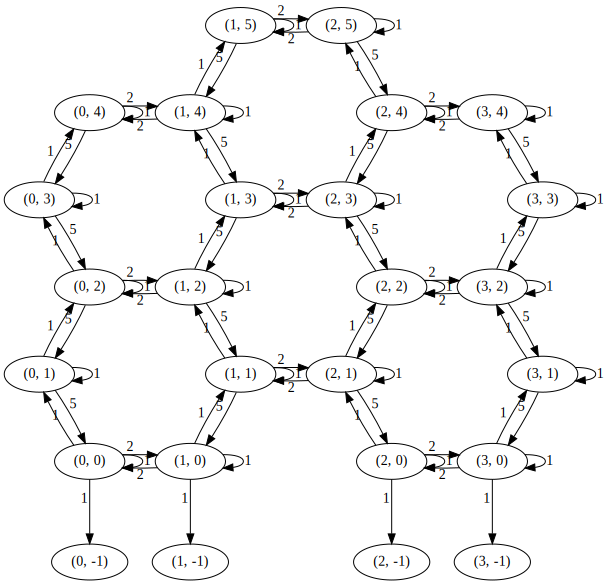

In [24]:
# "triangular", "hexagonal", "grid_2d"
nw = sn.build_sponge_network(
    grid_type="hexagonal", n_cols=3, n_rows=2,
    layout={
        "weights_sink_edge": 1,
        "weights_loop": 1,
        "weights_horizontal": 2,
        "weights_up_down": 5,
        "weights_down_up": 1,
        "generate_sinks": True,
    },
    visual_sink_edge_length=1.
)

nw.resource_network.plot(scale=1.4)

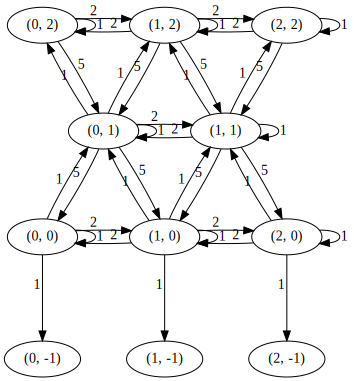

In [26]:
# "triangular", "hexagonal", "grid_2d"
nw = sn.build_sponge_network(
    grid_type="triangular", n_cols=3, n_rows=2,
    layout={
        "weights_sink_edge": 1,
        "weights_loop": 1,
        "weights_horizontal": 2,
        "weights_up_down": 5,
        "weights_down_up": 1,
        "generate_sinks": True,
    },
    visual_sink_edge_length=1.
)

nw.resource_network.plot(scale=1.7)

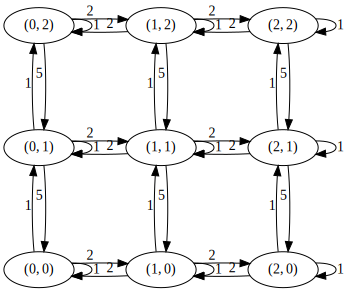

In [31]:
# "triangular", "hexagonal", "grid_2d"
nw = sn.build_sponge_network(
    grid_type="grid_2d", n_cols=2, n_rows=2,
    layout={
        "weights_sink_edge": 1,
        "weights_loop": 1,
        "weights_horizontal": 2,
        "weights_up_down": 5,
        "weights_down_up": 1,
        "generate_sinks": False,
    },
    visual_sink_edge_length=1.
)

nw.resource_network.plot(scale=1.7)

In [38]:
G = nw.resource_network.G
def partition_function(u, v):
    (i1, j1), (i2, j2) = (u, v)
    return j1 == j2 and {i1, i2} == {0, 2}
G_q = nx.quotient_graph(G, partition_function)
nw_q = nw.altered(lambda G_: G_q)
# nw_q.resource_network.plot()
G_q.nodes[frozenset({(1, 1)})]

{'graph': <networkx.classes.digraph.DiGraph at 0x7fc269eb9450>,
 'nnodes': 1,
 'nedges': 1,
 'density': 0}

In [15]:
sim = nw.run_sponge_simulation([5, 0], n_iters=10)
nw.plot_simulation(sim, scale=1)

interactive(children=(IntSlider(value=0, description='№ of iteration', max=9), Output()), _dom_classes=('widge…

In [6]:
nw.resource_network.G.nodes()

NodeView(((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (0, -1), (1, -1), (2, -1), (3, -1)))

In [7]:
R = np.array([
        [0, 1, 2],
        [1, 0, 0],
        [1, 3, 0]
    ])
rn = sn.resource_networks.ResourceNetwork(nx.from_numpy_array(R, create_using=nx.DiGraph))

In [8]:
R

array([[0, 1, 2],
       [1, 0, 0],
       [1, 3, 0]])

In [9]:
rn.stochastic_matrix

array([[0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ],
       [0.25      , 0.75      , 0.        ]])

In [10]:
v = np.array([[1, 1, 2]])
np.tensordot(v, np.array([1, 1, 1]), 0)

array([[[1, 1, 1],
        [1, 1, 1],
        [2, 2, 2]]])

In [11]:
(np.array([1, 1, 1])@R)

array([2, 4, 2])